In [ ]:
import contextily as cx
import geopandas as gpd
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

from uhi_drivers_lausanne import regr_utils

figwidth, figheight = plt.rcParams["figure.figsize"]

In [ ]:
stations_gdf_filepath = "../data/processed/stations.gpkg"
ts_df_filepath = "../data/processed/ts-df.csv"

fig_t_mean_map_filepath = "../reports/figures/t-mean-map.png"
fig_uhi_ts_filepath = "../reports/figures/uhi-ts.pdf"
fig_uhi_hourly_filepath = "../reports/figures/uhi-hourly.pdf"
fig_uhi_mean_hist_filepath = "../reports/figures/uhi-mean-hist.pdf"

In [ ]:
stations_gdf = gpd.read_file(stations_gdf_filepath)
# get the station id column label
station_id_col = stations_gdf.columns.difference(["geometry", "source"])[0]
# set the station id as index
stations_gdf = stations_gdf.set_index(station_id_col)
stations_gdf

,source,geometry
station_id,,
NABLAU,official,POINT (2539020.000 1152974.000)
PUY,official,POINT (2540819.000 1151510.000)
WSLLAF,official,POINT (2539058.000 1156741.000)
VD_Lausanne_PdL,official,POINT (2537375.000 1154164.000)
VD_Bussigny,official,POINT (2532800.000 1155659.000)
...,...,...
70:ee:50:9c:fb:46,cws,POINT (2527702.183 1151467.034)
70:ee:50:a4:19:de,cws,POINT (2532937.740 1153196.630)
70:ee:50:a4:1d:a0,cws,POINT (2526507.843 1151585.243)


In [ ]:
ts_df = pd.read_csv(ts_df_filepath, parse_dates=["time"])
ts_df

,time,station_id,T,source,UHI
0,2023-08-19 00:00:00,NABLAU,23.400000,official,4.300000
1,2023-08-19 00:00:00,PUY,23.066667,official,3.966667
2,2023-08-19 00:00:00,WSLLAF,23.300000,official,4.200000
3,2023-08-19 00:00:00,VD_Lausanne_PdL,22.955000,official,3.855000
4,2023-08-19 00:00:00,VD_Bussigny,21.951000,official,2.851000
...,...,...,...,...,...
33082,2023-08-25 22:00:00,70:ee:50:96:f5:ca,23.700000,cws,2.300000
33083,2023-08-25 22:00:00,70:ee:50:9c:fb:46,26.200000,cws,4.800000
33084,2023-08-25 22:00:00,70:ee:50:a4:19:de,25.900000,cws,4.500000
33085,2023-08-25 22:00:00,70:ee:50:a4:1d:a0,25.600000,cws,4.200000


In [ ]:
days = ts_df[ts_df["time"].dt.hour == 0]["time"].unique()

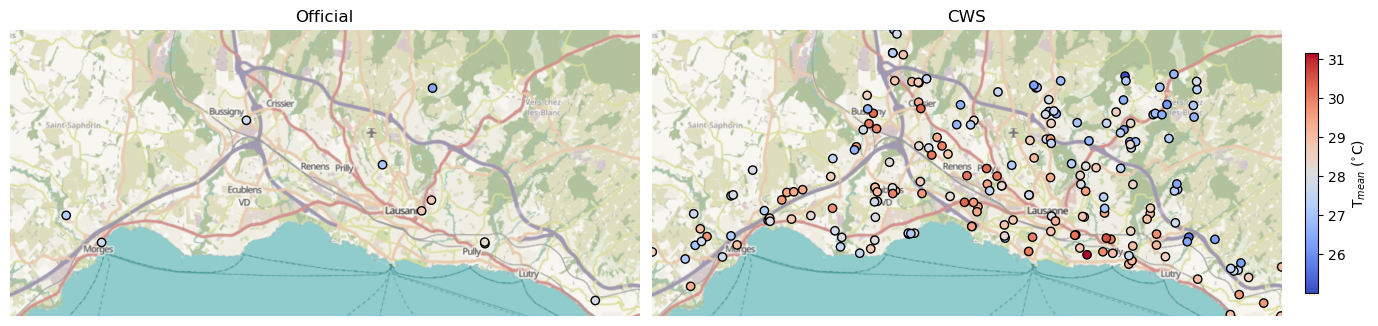

In [ ]:
num_cols = 2
fig, axes = plt.subplots(
    1, num_cols, figsize=(figwidth * num_cols, figheight), layout="constrained"
)

cmap = "coolwarm"
station_T_mean_gdf = stations_gdf[["source", "geometry"]].assign(
    T_mean=ts_df.groupby(station_id_col)["T"].mean()
)
# common legend
vmin = station_T_mean_gdf["T_mean"].min()
vmax = station_T_mean_gdf["T_mean"].max()
# common extent
extent = station_T_mean_gdf.total_bounds
for source, ax, title in zip(["official", "cws"], axes, ["Official", "CWS"]):
    station_T_mean_gdf[station_T_mean_gdf["source"] == source].plot(
        column="T_mean",
        cmap=cmap,
        ax=ax,
        legend=False,
        # legend_kwds={"label": "$\hat{T}$ ($^{\circ}$C)", "shrink": 0.5},
        vmin=vmin,
        vmax=vmax,
        edgecolor="black",
    )
    ax.set_xlim(extent[[0, 2]])
    ax.set_ylim(extent[[1, 3]])
    cx.add_basemap(ax, crs=stations_gdf.crs, attribution=False)
    ax.set_axis_off()
    ax.set_title(title)

# add colorbar
sm = plt.cm.ScalarMappable(cmap=cmap, norm=plt.Normalize(vmin=vmin, vmax=vmax))
cbar_ax = fig.add_axes([1.015, 0.25, 0.01, 0.5])
cbar = fig.colorbar(sm, cax=cbar_ax, orientation="vertical")
cbar_ax.set_ylabel("T$_{mean}$ ($^{\circ}$C)")
fig.savefig(fig_t_mean_map_filepath, bbox_inches="tight")

In [ ]:
stations_gdf[["source", "geometry"]].assign(
    **{"UHI_mean": ts_df.groupby(station_id_col)["UHI"].mean()}
)

,source,geometry,UHI_mean
station_id,,,
NABLAU,official,POINT (2539020.000 1152974.000),3.589601
PUY,official,POINT (2540819.000 1151510.000),2.659046
WSLLAF,official,POINT (2539058.000 1156741.000),1.276466
VD_Lausanne_PdL,official,POINT (2537375.000 1154164.000),1.860125
VD_Bussigny,official,POINT (2532800.000 1155659.000),2.593854
...,...,...,...
70:ee:50:9c:fb:46,cws,POINT (2527702.183 1151467.034),4.942515
70:ee:50:a4:19:de,cws,POINT (2532937.740 1153196.630),5.995210
70:ee:50:a4:1d:a0,cws,POINT (2526507.843 1151585.243),3.761078


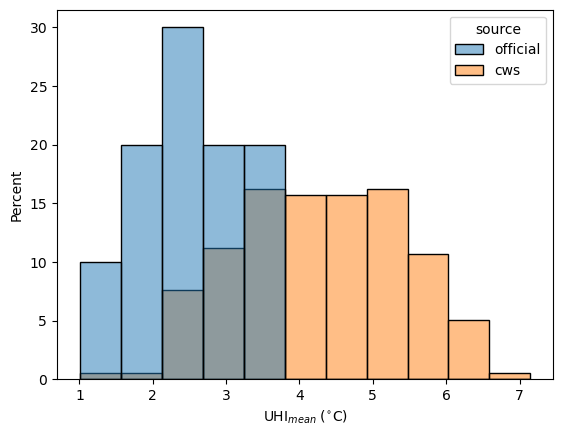

In [ ]:
fig, ax = plt.subplots(figsize=(figwidth, figheight))
station_uhi_mean_gdf = stations_gdf[["source", "geometry"]].assign(
    **{"UHI_mean": ts_df.groupby(station_id_col)["UHI"].mean()}
)
sns.histplot(
    data=station_uhi_mean_gdf,
    x="UHI_mean",
    hue="source",
    stat="percent",
    common_norm=False,
    ax=ax,
)
ax.set_xlabel("UHI$_{mean}$ ($^{\circ}$C)")
fig.savefig(fig_uhi_mean_hist_filepath)

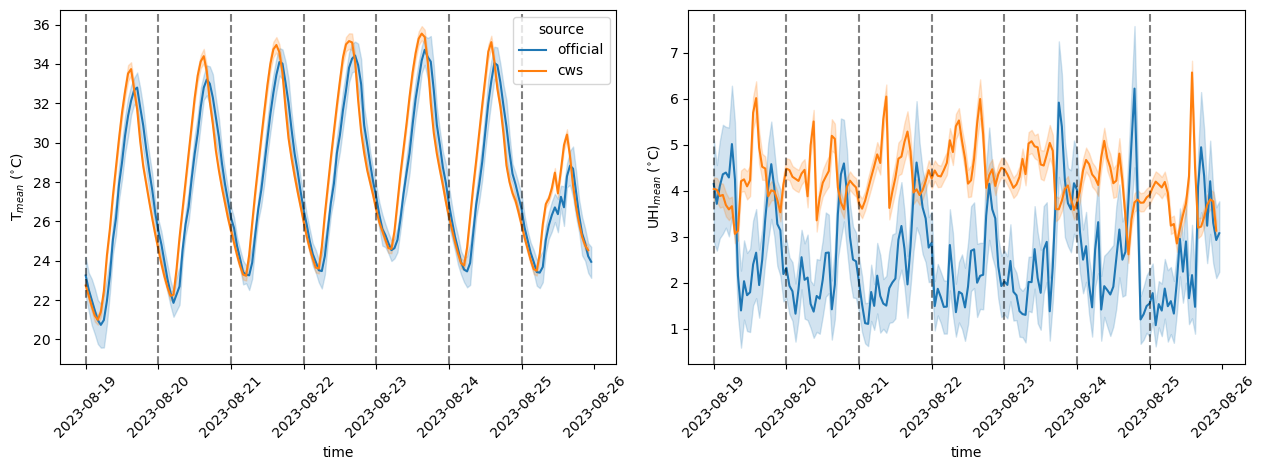

In [ ]:
fig, axes = plt.subplots(1, num_cols, figsize=(figwidth * num_cols, figheight))
for var, ax, legend in zip(["T", "UHI"], axes, [True, False]):
    sns.lineplot(data=ts_df, x="time", y=var, hue="source", ax=ax, legend=legend)
    for day in days:
        ax.axvline(day, color="black", linestyle="--", alpha=0.5)
    ax.tick_params(axis="x", rotation=45)
    ax.set_ylabel(var + "$_{mean}$ ($^{\circ}$C)")

fig.tight_layout()
fig.savefig(fig_uhi_ts_filepath)

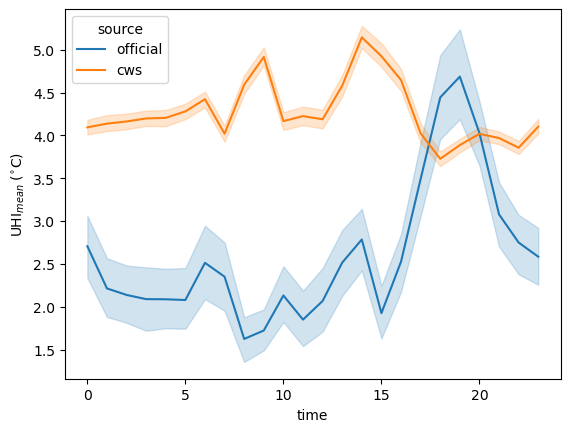

In [ ]:
fig, ax = plt.subplots(figsize=(figwidth, figheight))
sns.lineplot(
    data=ts_df.assign(**{"time": ts_df["time"].dt.hour}),
    x="time",
    y="UHI",
    hue="source",
    ax=ax,
)
ax.set_ylabel("UHI$_{mean}$ ($^{\circ}$C)")
fig.savefig(fig_uhi_hourly_filepath)